In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [39]:
train_df=pd.read_csv(r"C:\Users\MECHREVO\OneDrive\Desktop\新建文件夹 (2)\train.csv")
test_df=pd.read_csv(r"C:\Users\MECHREVO\OneDrive\Desktop\新建文件夹 (2)\test.csv")
train_df
#基础数据探索



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [40]:
#检查并处理问题数据，数据清洗
delete_columns=train_df.isna().sum()[train_df.isna().sum()>300].index
train_df.drop(columns=delete_columns,inplace=True)
test_df.drop(columns=delete_columns,inplace=True)
train_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [41]:
#筛出数字列和非数字列
num_columns=train_df.drop(columns=['SalePrice']).select_dtypes(include=[np.number]).columns
object_columns=train_df.drop(columns=['SalePrice']).select_dtypes(include=[object]).columns
# train_df[num_columns]=train_df[num_columns].fillna(value=train_df[num_columns].median())
# train_df[object_columns]=train_df[object_columns].fillna(value=train_df[object_columns].mode().iloc[0])
# train_df.isna().sum().sort_values()
num_imputer=SimpleImputer(strategy='median')
num_imputer.fit(train_df[num_columns])
train_df[num_columns]=num_imputer.transform(train_df[num_columns])
test_df[num_columns]=num_imputer.transform(test_df[num_columns])
obj_imputer=SimpleImputer(strategy='most_frequent',fill_value='no')
obj_imputer.fit(train_df[object_columns])
train_df[object_columns]=obj_imputer.transform(train_df[object_columns])
test_df[object_columns]=obj_imputer.transform(test_df[object_columns])
train_df.isna().sum().sort_values(ascending=False)
test_df.isna().sum().sort_values(ascending=False)
#缺失值填补完毕
train_df.duplicated().sum()




C:\Users\MECHREVO\AppData\Local\Temp\ipykernel_25264\3494572694.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  object_columns=train_df.drop(columns=['SalePrice']).select_dtypes(include=[object]).columns


np.int64(0)

Text(0.5, 1.0, '高相关热力图')

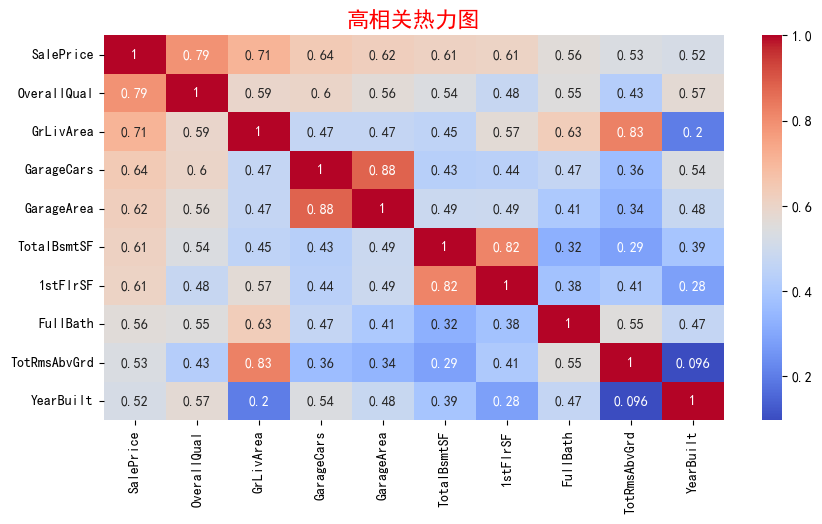

In [42]:
from matplotlib import rcParams
rcParams['font.sans-serif']=['SimHei']
corr=train_df.select_dtypes(include=[np.number]).corr()
top_corr=corr['SalePrice'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.heatmap(data=corr.loc[top_corr.index,top_corr.index],annot=True,cmap='coolwarm')
plt.title('高相关热力图',color='r',fontsize=16)

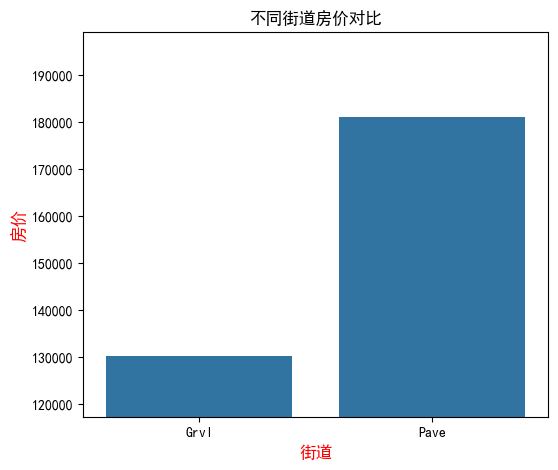

In [43]:
df_street=train_df.groupby('Street').agg({
    'SalePrice':'mean'
})
plt.figure(figsize=(6,5))
sns.barplot(x=df_street.index,y=df_street['SalePrice'])
plt.title('不同街道房价对比')
plt.xlabel('街道',color='red',fontsize=12)
plt.ylabel('房价',color='red',fontsize=12)
plt.ylim(min(df_street['SalePrice'])*0.9,max(df_street['SalePrice'])*1.1)
plt.show()
#街道对房价的影响很大

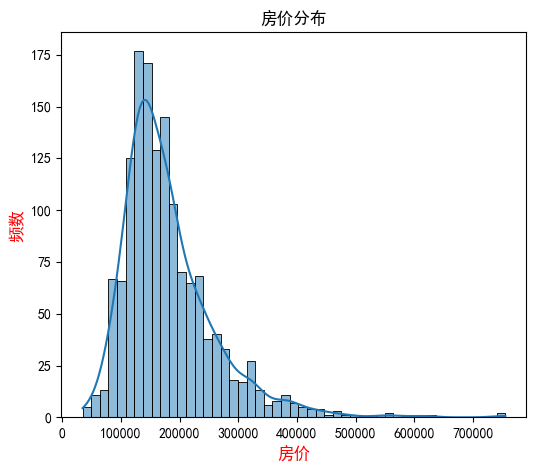

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [44]:
#探索性数据分析（EDA）—— 找到特征和房价的关联
plt.figure(figsize=(6,5))
sns.histplot(train_df['SalePrice'],kde=True)
plt.title('房价分布')
plt.xlabel('房价',color='red',fontsize=12)
plt.ylabel('频数',color='red',fontsize=12)
plt.show()
#房价分布近似正态分布,稍微偏左
#房价的中位数为163000,均值为180921,说明房价存在较大的偏斜
train_df['SalePrice'].describe()

d:\Python\PythonLearing\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


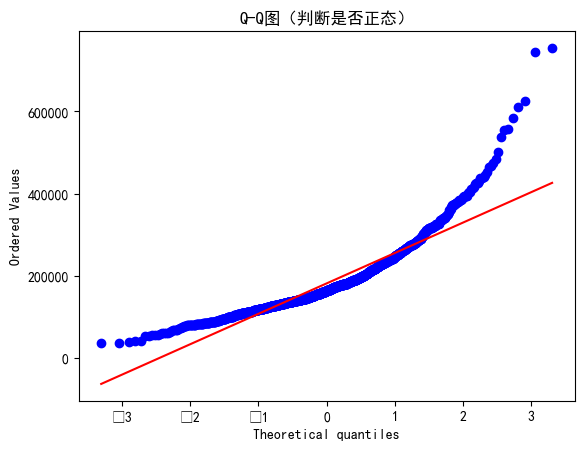

In [45]:
from scipy import stats
stats.probplot(train_df['SalePrice'], plot=plt)
plt.title('Q-Q图（判断是否正态）')
plt.show()

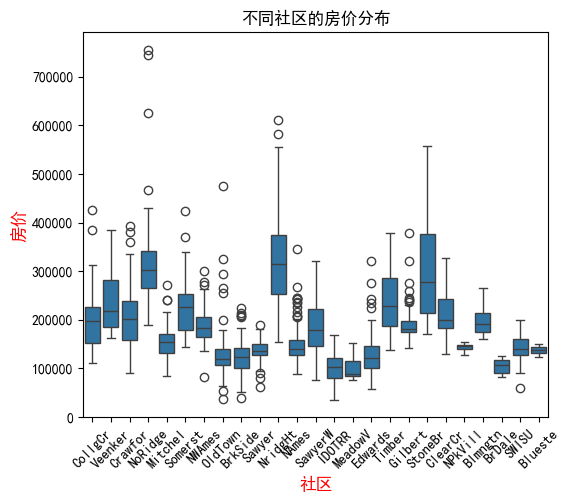

In [46]:
# 以Neighborhood（街区）为例，看不同街区的房价分布
plt.figure(figsize=(6,5))
sns.boxplot(data=train_df,x='Neighborhood',y='SalePrice')
plt.title('不同社区的房价分布')
plt.xlabel('社区',color='red',fontsize=12)
plt.ylabel('房价',color='red',fontsize=12)
plt.xticks(rotation=45)
plt.show()



In [47]:
#特征工程
train_df=pd.get_dummies(train_df,columns=object_columns,drop_first=True,dtype=int)
test_df=pd.get_dummies(test_df,columns=object_columns,drop_first=True,dtype=int)



In [48]:
y=np.log1p(train_df['SalePrice'])
X=train_df.drop(columns=['SalePrice'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [49]:
#模型训练与评估
#回归树
from sklearn.tree import DecisionTreeRegressor
clr=DecisionTreeRegressor(random_state=24)
print(cross_val_score(clr,X_train,y_train,cv=10).mean())
clr.fit(X_train,y_train)
score=clr.score(X_test,y_test)
score

0.7441387566906335


0.7061347429344086

In [50]:
#调参
params={
    'max_depth':np.arange(5,35,5),
    'criterion':['squared_error','friedman_mse','absolute_error']
}
gs=GridSearchCV(estimator=clr,param_grid=params,cv=10)
gs.fit(X_train,y_train)
print(gs.best_params_)
print(gs.best_score_)


KeyboardInterrupt: 

In [ ]:
# model=gs.best_estimator_
# score=model.score(X_test,y_test)
# print(cross_val_score(model,X_train,y_train,cv=10).mean())
# print(score)
clf=DecisionTreeRegressor(random_state=24,max_depth=20,criterion='friedman_mse',min_samples_leaf=20)
print(cross_val_score(clf,X_train,y_train,cv=10).mean())
clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
score#决策树最优模型

0.7593355906641512


0.7604438976940447

In [ ]:
#决策树最好模型
clg=DecisionTreeRegressor(random_state=24,max_depth=40,criterion='squared_error',min_samples_leaf=15)
clg.fit(X_train,y_train)
score=clg.score(X_test,y_test)
print(score)
cross_val_score(clg,X_train,y_train,cv=10).mean()

0.7663779128686193


np.float64(0.7607229009814064)

In [ ]:
#随机森林回归树
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=24,n_estimators=100)
rfr.fit(X_train,y_train)
score=rfr.score(X_test,y_test)

cross_val_score(rfr,X_train,y_train,cv=10).mean()


np.float64(0.8610898299159215)

In [ ]:
score_list=[]
for i in range(290,310,10):
    clr=RandomForestRegressor(random_state=24,n_estimators=i)
    clr.fit(X_train,y_train)
    score=cross_val_score(clr,X_train,y_train,cv=10).mean()
    score_list.append(score)
plt.figure(figsize=(10,5))
plt.plot(range(290,310,10),score_list,marker='o')
print(max(score_list),score_list.index(max(score_list))*10+290)
plt.title('随机森林不同树数量的表现')
plt.xlabel('树的数量',color='red',fontsize=12)
plt.ylabel('交叉验证得分',color='red',fontsize=12)
plt.show()

KeyboardInterrupt: 

In [51]:

params={
    'n_estimators':range(200,230),
    'max_depth':[20,30,40],
    'min_samples_leaf':[2,5,10]
}
gs=GridSearchCV(estimator=rfr,param_grid=params,cv=10)
gs.fit(X_train,y_train)
print(gs.best_params_)
print(gs.best_score_)

KeyboardInterrupt: 

In [52]:
# model=gs.best_estimator_
# score=model.score(X_test,y_test)
# print(score)
clr=RandomForestRegressor(random_state=24,n_estimators=290)#随机森林最好模型
clr.fit(X_train,y_train)
score=clr.score(X_test,y_test)
print(score)
cross_val_score(clr,X_train,y_train,cv=10).mean()

0.8793912487550684


KeyboardInterrupt: 

In [53]:
#XGBoost回归树
from xgboost import XGBRegressor
xgb=XGBRegressor(random_state=24,n_estimators=100)
xgb.fit(X_train,y_train)
score=xgb.score(X_test,y_test)
print(score)


0.8653593160841739


In [54]:
score_list=[]
for i in range(35,50):
    xgb=XGBRegressor(random_state=24,n_estimators=i)
    xgb.fit(X_train,y_train)
    score=cross_val_score(xgb,X_train,y_train,cv=10).mean()
    score_list.append(score)    
plt.figure(figsize=(10,5))
plt.plot(range(35,50),score_list,marker='o')
print(max(score_list),score_list.index(max(score_list))+35)
plt.title('XGBoost不同树数量的表现')
plt.xlabel('树的数量',color='red',fontsize=12)
plt.ylabel('交叉验证得分',color='red',fontsize=12)
plt.show()

KeyboardInterrupt: 

In [55]:
#XGBoost回归树分数最高模型
# xgb=XGBRegressor(random_state=10,n_estimators=40)
# xgb.fit(X_train,y_train)
# score=xgb.score(X_test,y_test)
# print(score)
cross_val_score(xgb,X_train,y_train,cv=10).mean()
xgb_opt = XGBRegressor(
    n_estimators=210,    # 增加树的数量（从100→200）
    max_depth=5,         # 降低树深度（从6/8→4）
    learning_rate=0.05,  # 降低学习率（从0.1→0.05）
    subsample=0.8,       # 每棵树随机用80%样本，减少过拟合
    colsample_bytree=0.8,# 每棵树随机用80%特征，减少过拟合
    random_state=42
)
xgb_opt.fit(X_train, y_train)
score_opt = xgb_opt.score(X_test, y_test)
print(f"优化后XGBoost模型得分: {score_opt:.4f}")
cross_val_score(xgb_opt,X_train,y_train,cv=10).mean()


优化后XGBoost模型得分: 0.8949


np.float64(0.8945463311226318)

## 初次我用原始数据三个模型测试下来，决策树交叉验证最高得0.771740014753702，测试得0.800298899506362，随机森林交叉验证最高可得0.8454419961512567，测试可得0.862786268665411，xgboost交叉验证最高可得0.8481398522853851，测试可得0.76优化后xgboost可得0.87795531153678与0.8558，第二次我将房价对数化，使房价分布更加服从正太话，让机器学习不受极大房价影响，而后决策树交叉验证最高得0.7663779128686193,测试0.7607229009814064，随机森林0.8612665961844307和0.8793912487550684，xgboost0.8945463311226318，0.8949

In [56]:
#统一训练集和测试集的特征
# keep_columns=X_train.columns
# for i in keep_columns:
#     if  i not in test_df.columns:
#         test_df[i]=0
# test_df=test_df[keep_columns]
# test_df
test_df=test_df.reindex(columns=X_train.columns,fill_value=0)


In [57]:
#融合结果预测模型
from sklearn.metrics import r2_score


rf_predictions=rfr.predict(X_test)
xgb_predictions=xgb_opt.predict(X_test)
real_predictions=rf_predictions*0.4+xgb_predictions*0.6
score=r2_score(y_test,real_predictions)
score



0.8913221972461185

In [58]:
test_predictions_rf=rfr.predict(test_df)
test_predictions_xgb=xgb_opt.predict(test_df)
final_predictions=np.expm1(test_predictions_rf*0.4+test_predictions_xgb*0.6)
submission=pd.DataFrame({
    'Id':test_df['Id'],
    'SalePrice':final_predictions
})
submission['Id']=submission['Id'].astype(int).astype(str)
submission.to_csv('submission.csv',index=False,encoding='utf-8')
print("提交文件已生成！文件名为：house_price_submission.csv")
print("提交文件前5行预览：")
print(submission.head())

提交文件已生成！文件名为：house_price_submission.csv
提交文件前5行预览：
     Id      SalePrice
0  1461  129421.215454
1  1462  150193.051723
2  1463  179494.859765
3  1464  186165.903337
4  1465  187948.624797
